In [52]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
from sklearn.model_selection import train_test_split
import gdown
from sklearn.metrics import  confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report


url = "https://drive.google.com/drive/folders/1K28d1ufLIZL6WtQIS4CE4H_EZZAzvTqX?usp=drive_link"
gdown.download_folder(url, quiet=True)

['/content/Progetto/train.csv']

In [53]:
# data preprocessing with OneHot encoding
X = pd.read_csv("/content/Progetto/train.csv")
def handle_dataset(X):
  y = X['Crime_Category']
  X = X.drop('Crime_Category', axis=1)

  # remove column with 80% null values
  X.drop('Cross_Street', axis=1)

  # handle missing data
  X['Victim_Sex'] = X['Victim_Sex'].replace(['H', 'X'], 'Unknown')
  X['Victim_Descent'] = X['Victim_Descent'].fillna('Unknown')
  X['Weapon_Description'] = X['Weapon_Description'].fillna('No Weapon')
  X['Weapon_Used_Code'] = X['Weapon_Used_Code'].fillna(0) # Weapon_Used_Code is in the range [1,3990], 0 is for missing code
  X['Modus_Operandi'] = X['Modus_Operandi'].fillna('Unknown')

  # data handling
  X['Date_Reported'] = pd.to_datetime(X['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
  X['Date_Occurred'] = pd.to_datetime(X['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
  X['Year_Reported'] = X.Date_Reported.dt.year
  X['Year_Occurred'] = X.Date_Occurred.dt.year
  X['Month_Reported'] = X.Date_Reported.dt.month
  X['Month_Occurred'] = X.Date_Occurred.dt.month
  X['Day_Reported'] = X.Date_Reported.dt.day
  X['Day_Occurred'] = X.Date_Occurred.dt.day
  X.drop(['Date_Reported', 'Date_Occurred'], axis=1, inplace=True)

  numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
  categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
  categorical_columns = [col for col in categorical_columns if col != 'Modus_Operandi']

  numerical_pipeline = make_pipeline(
      SimpleImputer(strategy='median'),
      StandardScaler()
  )

  categorical_pipeline = make_pipeline(
      SimpleImputer(strategy='most_frequent'),
      OneHotEncoder(handle_unknown='ignore', sparse_output=False)
      )

  modus_operandi_pipeline = make_pipeline(
      SimpleImputer(strategy='most_frequent'),
      CountVectorizer(preprocessor=lambda x:x[0])
  )

  preprocessor = ColumnTransformer(transformers=[
      ('num', numerical_pipeline, numerical_columns),
      ('cat', categorical_pipeline, categorical_columns),
      ('modus_operandi', modus_operandi_pipeline, ['Modus_Operandi'])
    ])

  #Split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # full pipeline
  pipe = make_pipeline(preprocessor)
  #Transform data
  X_train = pipe.fit_transform(X_train)
  X_test = pipe.transform(X_test)
  label_encoder = LabelEncoder()
  y_train= label_encoder.fit_transform(y_train)
  y_test=label_encoder.transform(y_test)
  return X_train, X_test, y_train, y_test


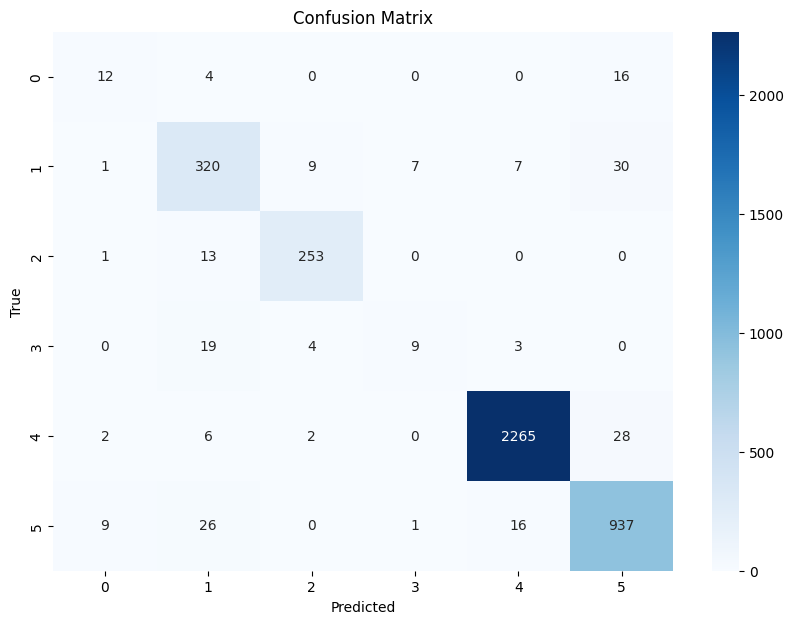

              precision    recall  f1-score   support

           0       0.48      0.38      0.42        32
           1       0.82      0.86      0.84       374
           2       0.94      0.95      0.95       267
           3       0.53      0.26      0.35        35
           4       0.99      0.98      0.99      2303
           5       0.93      0.95      0.94       989

    accuracy                           0.95      4000
   macro avg       0.78      0.73      0.75      4000
weighted avg       0.95      0.95      0.95      4000



In [54]:
X_train, X_test, y_train, y_test=handle_dataset(X)
model.fit(X_train,y_train)
# Visualize the Confusion Matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('\n')
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
#model.score(X_test,y_test)
report=classification_report(y_test,y_pred)
print(report)




In [55]:
# data preprocessing with Label encoding
X = pd.read_csv("/content/Progetto/train.csv")
def handle_dataset_v2(X):
  y = X['Crime_Category']
  X = X.drop('Crime_Category', axis=1)

  # remove column with 80% null values
  X.drop('Cross_Street', axis=1)

  # handle missing data
  X['Victim_Sex'] = X['Victim_Sex'].replace(['H', 'X'], 'Unknown')
  X['Victim_Descent'] = X['Victim_Descent'].fillna('Unknown')
  X['Weapon_Description'] = X['Weapon_Description'].fillna('No Weapon')
  X['Weapon_Used_Code'] = X['Weapon_Used_Code'].fillna(0) # Weapon_Used_Code is in the range [1,3990], 0 is for missing code
  X['Modus_Operandi'] = X['Modus_Operandi'].fillna('Unknown')

  # data handling
  X['Date_Reported'] = pd.to_datetime(X['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
  X['Date_Occurred'] = pd.to_datetime(X['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
  X['Year_Reported'] = X.Date_Reported.dt.year
  X['Year_Occurred'] = X.Date_Occurred.dt.year
  X['Month_Reported'] = X.Date_Reported.dt.month
  X['Month_Occurred'] = X.Date_Occurred.dt.month
  X['Day_Reported'] = X.Date_Reported.dt.day
  X['Day_Occurred'] = X.Date_Occurred.dt.day
  X.drop(['Date_Reported', 'Date_Occurred'], axis=1, inplace=True)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


  numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
  categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

  numerical_pipeline = make_pipeline(
      SimpleImputer(strategy='median'),
      StandardScaler()
  )

  def label_encoding_column(df, column):
      lab_encoder = LabelEncoder()
      df[column] = lab_encoder.fit_transform(df[column])
      return df

  for col in categorical_columns:
    if col == 'Modus_Operandi':
      continue
    X = label_encoding_column(X, col)

  modus_operandi_pipeline = make_pipeline(
      SimpleImputer(strategy='most_frequent'),
      CountVectorizer(preprocessor=lambda x:x[0])
  )

  preprocessor = ColumnTransformer(transformers=[
      ('num', numerical_pipeline, numerical_columns),
      ('modus_operandi', modus_operandi_pipeline, ['Modus_Operandi'])
    ])

  # full pipeline
  pipe = make_pipeline(
      preprocessor
  )

  X_train = pipe.fit_transform(X_train)
  X_test = pipe.transform(X_test)
  return X_train,X_test,y_train,y_test


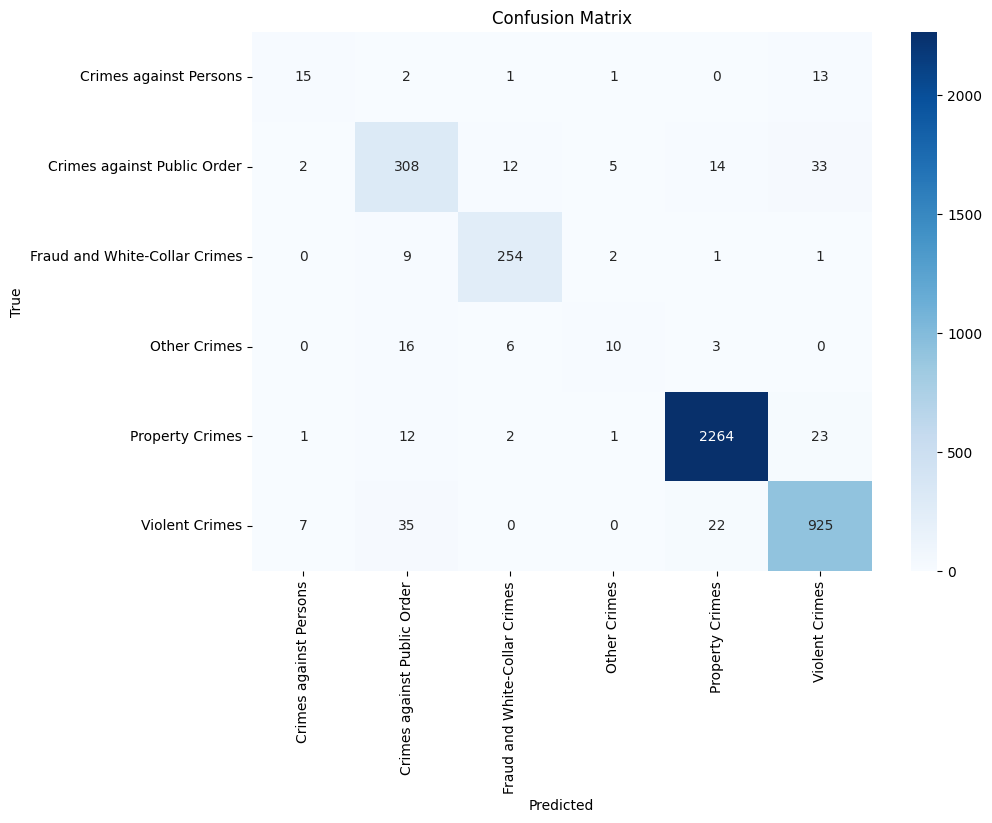

                               precision    recall  f1-score   support

       Crimes against Persons       0.60      0.47      0.53        32
  Crimes against Public Order       0.81      0.82      0.81       374
Fraud and White-Collar Crimes       0.92      0.95      0.94       267
                 Other Crimes       0.53      0.29      0.37        35
              Property Crimes       0.98      0.98      0.98      2303
               Violent Crimes       0.93      0.94      0.93       989

                     accuracy                           0.94      4000
                    macro avg       0.79      0.74      0.76      4000
                 weighted avg       0.94      0.94      0.94      4000



In [56]:

X_train,X_test,y_train,y_test=handle_dataset_v2(X)
model=LogisticRegression()
model.fit(X_train,y_train)
# Visualize the Confusion Matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('\n')
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
#model.score(X_test,y_test)
report=classification_report(y_test,y_pred)
print(report)

